<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/0314_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 

- 한글 폰트 참고) https://teddylee777.github.io/colab/colab-korean/

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (28.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and dir

In [3]:
plt.rc('font', family = 'NamuBarunGothic')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#경고창 무시
warnings.filterwarnings('ignore')

- 스케일 조정

In [9]:
sns.set_context('paper', #notebook, talk, poster
                rc = {'font size':15,
                      'xtick.labelsize':15,
                      'ytick.labelsize':15,
                      'axes.labelsize':15}
                )

 - 다변량 데이터: 변량이 2개인 이변량 데이터와 변량이 3개 이상인 데이터를 포함함. 

 - 다변량 데이터를 그래프로 표현할 떄는 색상으로 구분하는 hue, 캔버스로 구분하는 col, 점 크기로 구분하는 size등의 파라미터를 이용해 시각화 차원을 넓혀나갈 수 있음

## 1) 병렬 막대 그래프.
 - 두 변량에 대한 빈도 막대그래프 2개를 각가 캔버스(Canvas)에 병렬로 나열한 그래프
  - sns.catplot함수에 kind = 'count'와 col에 옵션을 주면됨
  

In [11]:
df_titanic = sns.load_dataset('titanic')  

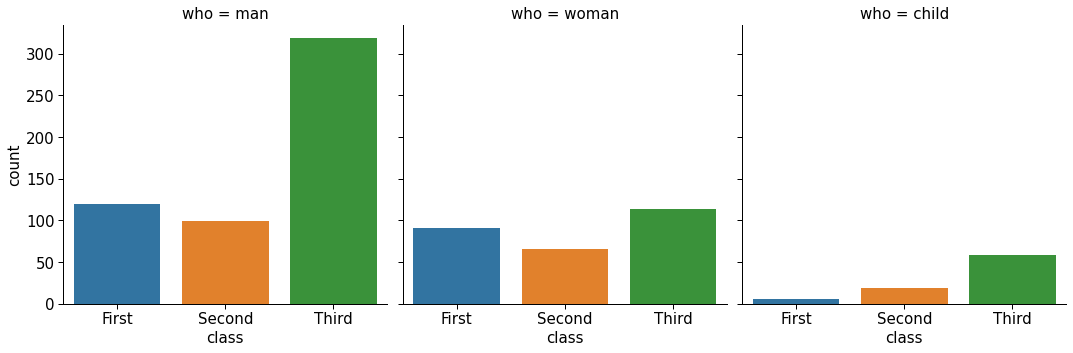

In [12]:
sns.catplot(x='class',
            col = 'who', #캔버스 분리하기
            kind = 'count', #빈도 막대그래프 그리기 
            data = df_titanic)

<AxesSubplot:xlabel='class', ylabel='count'>

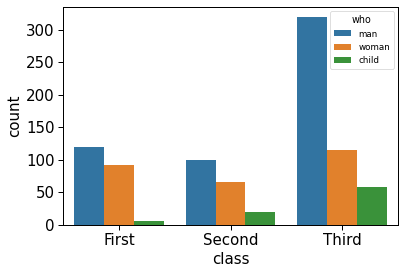

In [16]:
#코드 1)
sns.countplot(x='class', hue='who', data = df_titanic)

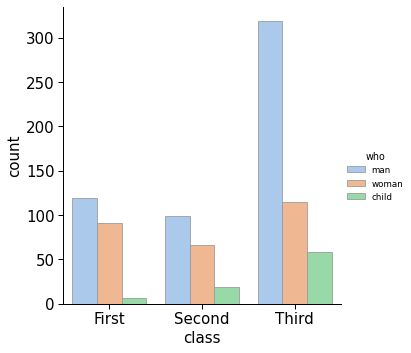

In [14]:
# 코드2) 
sns.catplot(x = 'class', hue ='who', kind = 'count',
            palette = 'pastel', #색상 팔레트 지정 : {'man': 'b', 'women': 'g', 'child': 'r'}
            edgecolor ='.6',
            data= df_titanic)

- sns.histplot 함수에 multiple='dodge' 옵션을 주어도 다중 막대그래프를 그릴 수 있습니다. sns.histplot 함수는 수치형 자료를 히스토그램으로 만들 때 사용하는 함수이지만, 히스토그램의 막대 사이에 간격을 주고 x축 눈금을 없애면 히스토그램을 일반 막대그래프처럼 만들 수 있습니다.

"\nax = sns.histplot(x='sex', hue='survived', \n                  multiple='dodge', # 다중 막대그래프 그리기\n                  shrink=.8, # 막대 사이 간격 조정\n                  data=df_titanic) \nax.tick_params(bottom=False) # x축 눈금 숨기기"

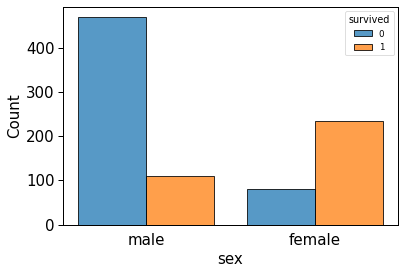

In [23]:
ax = sns.histplot(x='sex', hue='survived',
                  multiple='dodge', #다중막대그래프 그리기
                  shrink=.8, #막대 사이 간격 조정
                  data = df_titanic)
ax.tick_params(bottom=False) #x축 눈금 숨기기

"""
ax = sns.histplot(x='sex', hue='survived', 
                  multiple='dodge', # 다중 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df_titanic) 
ax.tick_params(bottom=False) # x축 눈금 숨기기"""

### 3) 누적 막대그래프

- Seaborn으로 누적 막대그래프를 만들려면 sns.histplot 함수에 multiple='stack' 옵션을 주면 됩니다.

In [ ]:
ax = sns.histplot(x='sex', hue='survived',
                  multiple='dodge', #다중막대그래프 그리기
                  shrink=.8, #막대 사이 간격 조정
                  data = df_titanic)
ax.tick_params(bottom=False) #x축 눈금 숨기기

- 단순 수평 누적 막대그래프
     - 수평 누적 막대그래프를 그리려면 x 파라미터 대신 y 파라미터를 사용하면 됩니다.

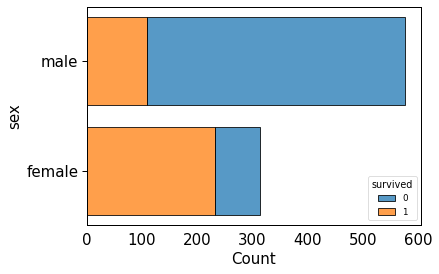

In [24]:
ax = sns.histplot(y='sex', hue='survived', 
                  multiple='stack', # 누적 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  data=df_titanic) 
ax.tick_params(bottom=False) # x축 눈금 숨기기

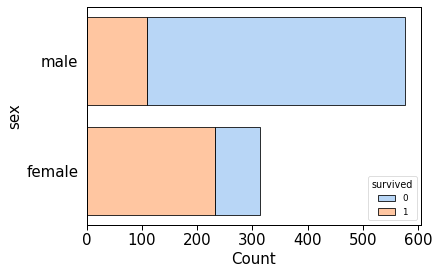

In [25]:
ax = sns.histplot(y='sex', hue='survived',  
                  multiple='stack', # 누적 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                  palette='pastel', # 색상 팔레트 지정
                  data=df_titanic);
ax.tick_params(left=False) # y축 눈금 안 보이게 하기

지금까지 다중 막대그래프와 누적 막대그래프로 이변량 범주형 데이터를 시각화하는 법을 알아보았습니다. 막대그래프 외에도 변량이 모두 범주형인 다차원 데이터를 시각화할 때는 모자이크 그래프(mosaic plot)를 사용하기도 합니다. 모자이크 그래프는 그룹 내의 데이터 백분율을 보여주는 누적 막대그래프입니다. 모자이크 그래프는 변수가 3개 이상일 때도 사용할 수 있습니다.

모자이크 그래프는 statmodels.graphics.mosaic 패키지의 mosaic 함수를 이용해서 그립니다. 코드는 다음과 같습니다.

Text(0.5, 1.0, '타이타닉호 성별 생존자')

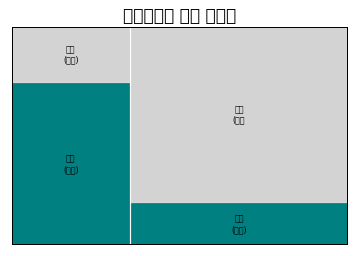

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

props = lambda key:{'color':'teal' if '1' in key else 'lightgray'}
labelizer = lambda k: {('female', '1'): '여성\n(생존)', ('female', '0'): '여성\n(사망)',
                       ('male', '1'): '남성\n(생존)', ('male', '0'): '남성\n(사망'}[k]

mosaic(df_titanic.sort_values('sex'),
       ['sex','survived'],
       properties = props, #색상변경
       labelizer = labelizer, #라벨변경
       axes_label = False) #측 라벨 숨기기

plt.title('타이타닉호 성별 생존자', fontsize=17)      #제목 내용 및 글자 크기 설정               


#matplot쓸 때는 한글을 안 쓰는게 좋기는 함

 - stripplot

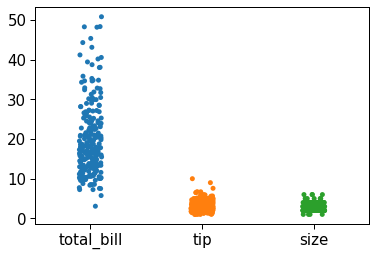

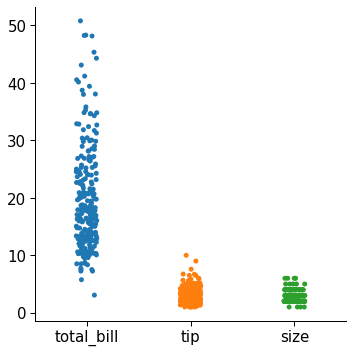

In [32]:
 df_tips = sns.load_dataset('tips') #팁 데이터

 sns.stripplot(data = df_tips)

 # or

 sns.catplot(kind = 'strip', data = df_tips)

# 다차원 데이터 시각화 : 수치형

### 1) 점그래프

- 점그래프는 데이터포인트를 점으로 나타낸 도표입니다. 점그래프를 이용하면 데이터의 실제 위치와 분포를 한눈에 파악할 수 있습니다. Seaborn에서 점그래프를 그리는 기본 함수는 sns.stripplot입니다.

#### stripplot


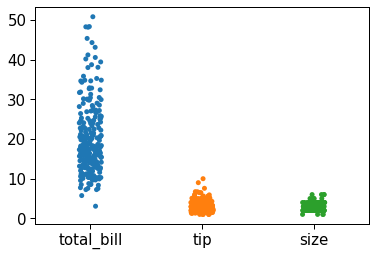

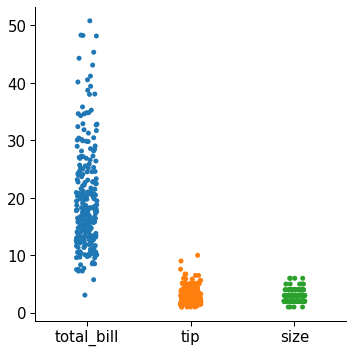

In [34]:
df_tips = sns.load_dataset('tips')# 팁 데이터

sns.stripplot(data = df_tips)

#or

sns.catplot(kind='strip', data = df_tips)

- sns.stripplot 함수에 jitter 옵션을 추가하면 데이터포인트를 일렬로 그릴 수 있습니다.

    - jitter: 지터(jitter)는 데이터 값에 약간의 노이즈를 추가하는 것, 노이즈를 추가하면 데이터 값이 조금씩 움직여서 같은 값을 가지는 데이터가 그래프에 여러 번 겹쳐서 표시되는 현상을 막아줌

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

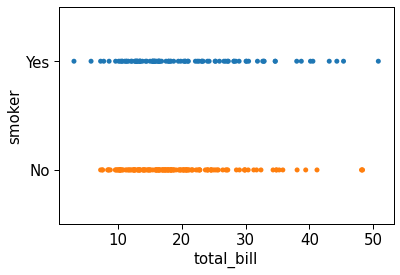

In [35]:
sns.stripplot(x = 'total_bill',y='smoker',
              jitter=False,
              data = df_tips)

<AxesSubplot:xlabel='tip', ylabel='day'>

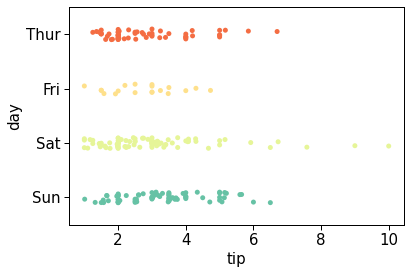

In [36]:
sns.stripplot(x = 'tip', y = 'day',
              palette = 'Spectral', #색상 팔레트 지정
              dodge = True,
              data = df_tips)

- dodge=True 옵션처럼 점그래프에서 데이터 포인트들이 서로 겹치지 않고 새의 무리처럼 보이게 그래프를 만드는 방법도 있습니다. 이때 사용하는 함수가 sns.swarmplot입니다.

#### swarmplot

- swarmplot 함수를 이용하면 점도표의 데이터포인트를 떼(swarm)처럼 무리를 만들어 데이터포인트가 중첩되는 문제를 해결할 수 있습니다. 떼 플롯을 그리는 기본 코드는 다음과 같습니다.

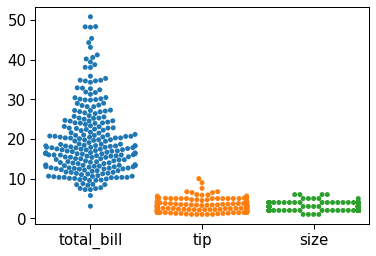

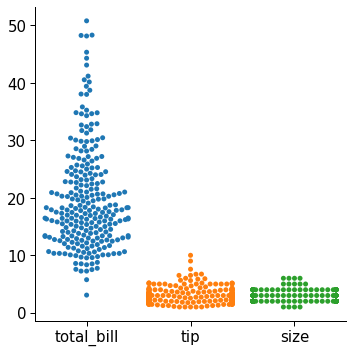

In [37]:
sns.swarmplot(data=df_tips)

# 또는 

sns.catplot(kind='swarm', data=df_tips)

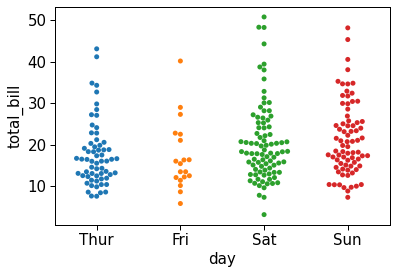

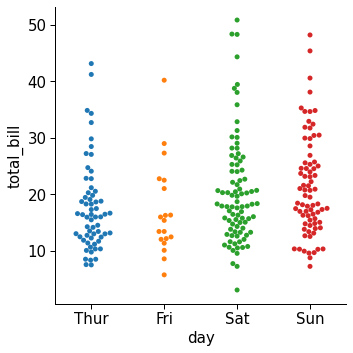

In [38]:
sns.swarmplot(x='day', y='total_bill', data=df_tips)

# 또는 

sns.catplot(x='day', y='total_bill', kind='swarm', data=df_tips)

### 2) 선분 그래프

- 실수 데이터의 분포를 선분으로 표현하고 싶다면 sns.rugplot 함수를 이용하면 됩니다. sns.rugplot은 데이터포인트를 각 축 위에 보여줍니다.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

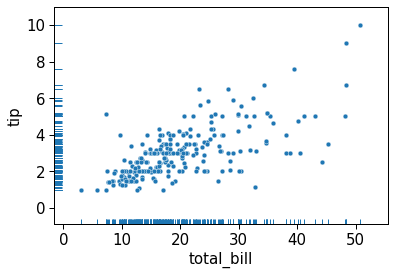

In [39]:
# rugplot은 겹치는 지점을 x,y축에 표시 
sns.scatterplot(data=df_tips, x="total_bill", y="tip")
sns.rugplot(data=df_tips, x="total_bill", y="tip") #잘 쓰진 않음

### 3) 요약 통계값 막대그래프

요약 통계값 막대그래프는 범주로 구분되는 수치형 자료의 평균과 그 평균의 95% 신뢰구간(confidence intervals)을 나타낸 막대그래프입니다. 신뢰구간은 막대 위 검정색 수직 선으로 표현됩니다. 요약 통계값 막대그래프를 그리려면 sns.barplot 함수를 사용하면 됩니다. sns.catplot 함수에 kind='bar' 옵션을 주어도 됩니다. 먼저 수직 요약 막대그래프를 그리는 법부터 알아보겠습니다.

**기본**


수직 요약 막대그래프

- 수직 평균 막대그래프를 그리는 코드는 다음과 같습니다.

  -왜 95프로 신뢰구간을 쓰는지?
    95프로가 된다면 99프로는 자동으로 들어감 
    95프로가 더 안정적이라서 
    p-value 5프로 보다 작으면 유의함(1프로 이미 포함됨)

    *그럼 5프로는 다 틀린것인가? 아님 
    *95개가 맞다는 걸 가르킴킴



NameError: ignored

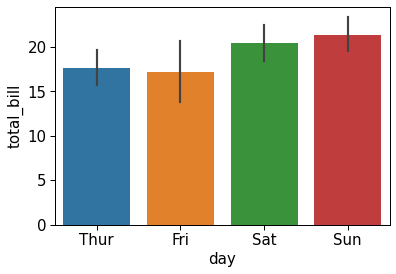

In [40]:
#띠가 달라지는 이유? -> 편차가 심하다는 걸 알려줌(95신뢰도는 같지만, 편차가 큼)
### 3) 요약 통계값 막대그래프
sns.barplot(x='day', y='total_bill', data=df_tips)

# 또는 

sns.catplot(x='day', y='total_bill', kind='bar', data=tips)
